# Modules

In [1]:
import json
from glob import glob
from io import StringIO

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from proj.conf import introduction, outputs
from proj.promptfoo import read_results

# Settings

These settings depend on the manuscript section

In [2]:
TEST_TYPES = [
    "Spelling/grammar",
    "Formatting",
    "Information accuracy",
    "Structure",
]

In [3]:
OUTPUT_FIGURES_DIR = outputs.FIGURES
OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURES_DIR)

PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/outputs/figures')

# Get list of outputs for each model

In [4]:
INPUT_DIR = introduction.CASES / "phenoplier" / "outputs"
assert INPUT_DIR.exists
display(INPUT_DIR)

PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/introduction/cases/phenoplier/outputs')

In [5]:
INPUT_MODELS = sorted(list(INPUT_DIR.glob("*")))

In [6]:
INPUT_MODELS

[PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/introduction/cases/phenoplier/outputs/claude-3-haiku-20240307'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/introduction/cases/phenoplier/outputs/claude-3-opus-20240229'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/introduction/cases/phenoplier/outputs/claude-3-sonnet-20240229'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/introduction/cases/phenoplier/outputs/gemma-2b-instruct-fp16'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/introduction/cases/phenoplier/outputs/gpt-3.5-turbo-0125'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/introduction/cases/phenoplier/outputs/gpt-4-0613'),
 PosixPath('/home/miltondp/projects/others/manubot/manubot-ai-editor-evals/introduction/cases/phenoplier/outputs/gpt-4-turbo-2024-04-09'),
 PosixPath('/home/miltondp/projects/othe

# Read all results

In [7]:
results = []
for model in INPUT_MODELS:
    model_results = read_results(model)
    results.append(model_results)

In [8]:
len(results)

16

In [9]:
results = pd.concat(results, ignore_index=True)

In [10]:
results.shape

(6960, 10)

In [11]:
results.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, introduct...",Formatting


In [12]:
results["model"].value_counts()

model
claude-3-haiku-20240307             435
claude-3-opus-20240229              435
claude-3-sonnet-20240229            435
gemma-2b-instruct-fp16              435
gpt-3.5-turbo-0125                  435
gpt-4-0613                          435
gpt-4-turbo-2024-04-09              435
llama2-7b-chat-fp16                 435
llama3-70b-instruct-q5_1            435
llama3-8b-instruct-fp16             435
mistral-7b-instruct-fp16            435
mistral-7b-instruct-v0.2-fp16       435
mixtral-8x22b-instruct-v0.1-q5_1    435
mixtral-8x7b-instruct-v0.1-q8_0     435
starling-lm-7b-alpha-fp16           435
starling-lm-7b-beta-fp16            435
Name: count, dtype: int64

In [13]:
results["prompt"].value_counts()

prompt
baseline                   2320
candidate_with_metadata    2320
candidate                  2320
Name: count, dtype: int64

In [14]:
results["test_description"].value_counts()

test_description
Keeps most references to other articles and doesn't make them up    1920
Has no spelling errors                                              1680
starts with context                                                 1680
ends with conclusion                                                1680
Name: count, dtype: int64

In [15]:
results["comp_type"].value_counts()

comp_type
Formatting              5760
Information accuracy     480
Structure                480
Spelling/grammar         240
Name: count, dtype: int64

In [16]:
results["comp_desc"].value_counts()

comp_desc
Starts with capital letter                                960
Ends with a period                                        960
Is a single paragraph                                     960
Doesn't include manuscript title                          960
Doesn't reference authors, keywords, introduction, etc    960
Has roughly the same length as input                      960
Has no spelling errors                                    240
Keeps most references to other articles                   240
Does not make up references to other articles             240
Starts with context                                       240
Ends with conclusion                                      240
Name: count, dtype: int64

# Pass rate (`passed`, by promptfoo)

## Stats

In [17]:
df = results.copy()

In [18]:
df.shape

(6960, 10)

In [19]:
df.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, introduct...",Formatting


In [20]:
df["prompt"].value_counts()

prompt
baseline                   2320
candidate_with_metadata    2320
candidate                  2320
Name: count, dtype: int64

In [21]:
df["test_description"].value_counts()

test_description
Keeps most references to other articles and doesn't make them up    1920
Has no spelling errors                                              1680
starts with context                                                 1680
ends with conclusion                                                1680
Name: count, dtype: int64

In [22]:
df["comp_type"].value_counts()

comp_type
Formatting              5760
Information accuracy     480
Structure                480
Spelling/grammar         240
Name: count, dtype: int64

## Test level

### Sum and normalize `passed` by model and prompt

**Description:** This statistic computed below, based on the `passed` column, measures if the test (by model and prompt) as a whole passed or failed, which is computed by promptfoo.
The test passes if all the assertions in it pass, so it's a stringent criteria.

In [23]:
passed_unique = results.groupby(["model", "prompt"])["passed"].count()

In [24]:
assert passed_unique.unique().shape[0] == 1
n_tests_per_group = float(passed_unique.unique()[0])
display(n_tests_per_group)

145.0

In [25]:
df = results.groupby(["model", "prompt"])["passed"].sum().to_frame().reset_index()

In [26]:
df.head()

,model,prompt,passed
0,claude-3-haiku-20240307,baseline,0
1,claude-3-haiku-20240307,candidate,0
2,claude-3-haiku-20240307,candidate_with_metadata,0
3,claude-3-opus-20240229,baseline,0
4,claude-3-opus-20240229,candidate,145


In [27]:
df = df.assign(pass_rate=lambda x: x["passed"] / n_tests_per_group)

In [28]:
df.shape

(48, 4)

In [29]:
df.head()

,model,prompt,passed,pass_rate
0,claude-3-haiku-20240307,baseline,0,0.0
1,claude-3-haiku-20240307,candidate,0,0.0
2,claude-3-haiku-20240307,candidate_with_metadata,0,0.0
3,claude-3-opus-20240229,baseline,0,0.0
4,claude-3-opus-20240229,candidate,145,1.0


In [30]:
df.sort_values("pass_rate")

,model,prompt,passed,pass_rate
0,claude-3-haiku-20240307,baseline,0,0.000000
25,llama3-70b-instruct-q5_1,candidate,0,0.000000
26,llama3-70b-instruct-q5_1,candidate_with_metadata,0,0.000000
27,llama3-8b-instruct-fp16,baseline,0,0.000000
28,llama3-8b-instruct-fp16,candidate,0,0.000000
29,llama3-8b-instruct-fp16,candidate_with_metadata,0,0.000000
34,mistral-7b-instruct-v0.2-fp16,candidate,0,0.000000
35,mistral-7b-instruct-v0.2-fp16,candidate_with_metadata,0,0.000000
11,gemma-2b-instruct-fp16,candidate_with_metadata,0,0.000000
24,llama3-70b-instruct-q5_1,baseline,0,0.000000


In [31]:
_df_stats = df["pass_rate"].describe()
display(_df_stats)
assert _df_stats["max"] <= 1.0

count    48.000000
mean      0.332759
std       0.365553
min       0.000000
25%       0.000000
50%       0.172414
75%       0.656897
max       1.000000
Name: pass_rate, dtype: float64

### Plot by prompt

In [32]:
# sort models by mean pass_rate in candidate prompts only (not baseline)
sorted_models = (
    df[df["prompt"].isin(("candidate", "candidate_with_metadata"))]
    .groupby("model")["pass_rate"]
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [33]:
sorted_models[-5:]

['starling-lm-7b-alpha-fp16',
 'claude-3-opus-20240229',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09']

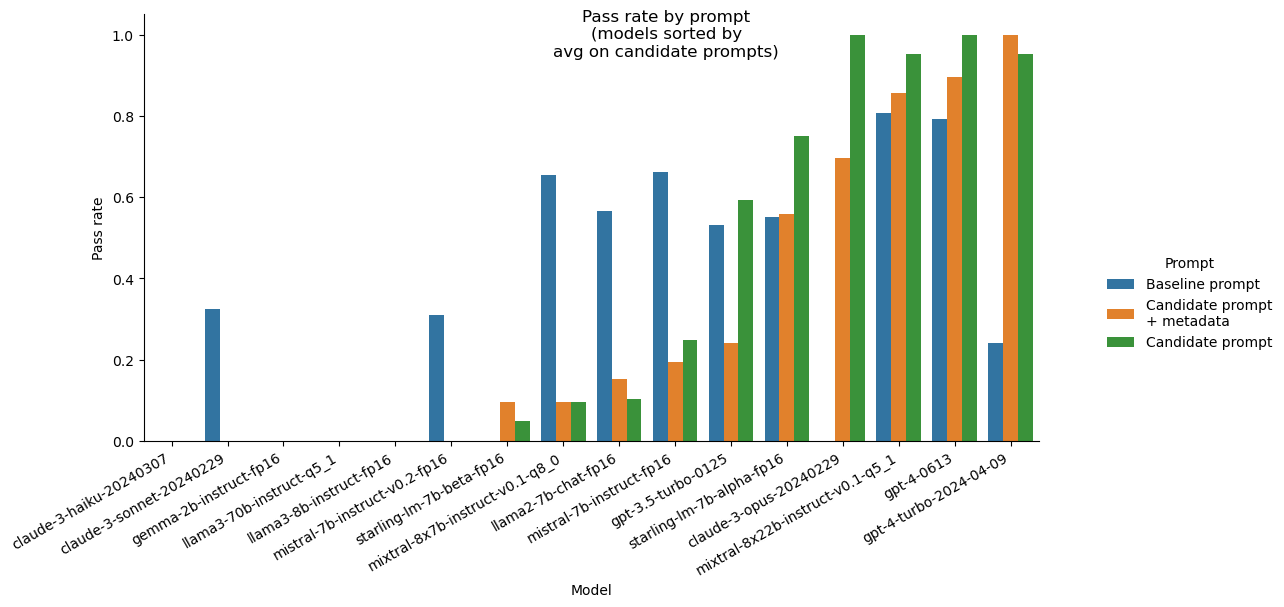

In [34]:
g = sns.catplot(
    data=df,
    x="model",
    y="pass_rate",
    hue="prompt",
    hue_order=["baseline", "candidate_with_metadata", "candidate"],
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    aspect=2,
)
g.fig.suptitle("Pass rate by prompt\n(models sorted by\navg on candidate prompts)")
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Pass rate")

g._legend.set_title("Prompt")
new_labels = ["Baseline prompt", "Candidate prompt\n+ metadata", "Candidate prompt"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

In [35]:
# this list is to check whether results match with those shown in the promptfoo's web interface
df.groupby(["model", "prompt"])["pass_rate"].mean()

model                             prompt                 
claude-3-haiku-20240307           baseline                   0.000000
                                  candidate                  0.000000
                                  candidate_with_metadata    0.000000
claude-3-opus-20240229            baseline                   0.000000
                                  candidate                  1.000000
                                  candidate_with_metadata    0.696552
claude-3-sonnet-20240229          baseline                   0.324138
                                  candidate                  0.000000
                                  candidate_with_metadata    0.000000
gemma-2b-instruct-fp16            baseline                   0.000000
                                  candidate                  0.000000
                                  candidate_with_metadata    0.000000
gpt-3.5-turbo-0125                baseline                   0.531034
                                

## Assertion level and type

### Sum and normalize `passed` by model and test type

**Description:** This statistic computed below, based on the `comp_pass` column, measures if the assertion (by model, prompt and assertion type/`comp_type`) inside each test passed or failed, which is computed by promptfoo.
The previous plot used the `passed` column, which is by test, but this is is by assertions (which belong to a single test).
The test the assertion belongs to fails if a single assertion in it fails.

In [36]:
passed_unique = results.groupby(["model", "prompt"])["comp_pass"].count()
display(passed_unique.head())
assert passed_unique.unique().shape[0] == 1

model                    prompt                 
claude-3-haiku-20240307  baseline                   145
                         candidate                  145
                         candidate_with_metadata    145
claude-3-opus-20240229   baseline                   145
                         candidate                  145
Name: comp_pass, dtype: int64

In [37]:
n_tests_per_group = passed_unique.unique()[0]
display(n_tests_per_group)

145

Understanding the above numbers:
* 145 = 7 * 5 + 8 * 5 + 7 * 5 + 7 * 5 = 145

In [38]:
df = results.groupby(["model", "prompt"])["comp_pass"].sum().to_frame().reset_index()

In [39]:
df.head()

,model,prompt,comp_pass
0,claude-3-haiku-20240307,baseline,115
1,claude-3-haiku-20240307,candidate,107
2,claude-3-haiku-20240307,candidate_with_metadata,104
3,claude-3-opus-20240229,baseline,110
4,claude-3-opus-20240229,candidate,145


In [40]:
# for testing purposes
df[df["model"].str.contains("mixtral-8x22")]

,model,prompt,comp_pass
36,mixtral-8x22b-instruct-v0.1-q5_1,baseline,140
37,mixtral-8x22b-instruct-v0.1-q5_1,candidate,144
38,mixtral-8x22b-instruct-v0.1-q5_1,candidate_with_metadata,141


In [41]:
df = df.assign(pass_rate=df.apply(lambda x: x["comp_pass"] / n_tests_per_group, axis=1))

In [42]:
df.shape

(48, 4)

In [43]:
df.head()

,model,prompt,comp_pass,pass_rate
0,claude-3-haiku-20240307,baseline,115,0.793103
1,claude-3-haiku-20240307,candidate,107,0.737931
2,claude-3-haiku-20240307,candidate_with_metadata,104,0.717241
3,claude-3-opus-20240229,baseline,110,0.758621
4,claude-3-opus-20240229,candidate,145,1.000000


In [44]:
df.sort_values("pass_rate")

,model,prompt,comp_pass,pass_rate
27,llama3-8b-instruct-fp16,baseline,80,0.551724
28,llama3-8b-instruct-fp16,candidate,87,0.600000
24,llama3-70b-instruct-q5_1,baseline,94,0.648276
35,mistral-7b-instruct-v0.2-fp16,candidate_with_metadata,94,0.648276
29,llama3-8b-instruct-fp16,candidate_with_metadata,95,0.655172
18,gpt-4-turbo-2024-04-09,baseline,95,0.655172
23,llama2-7b-chat-fp16,candidate_with_metadata,99,0.682759
45,starling-lm-7b-beta-fp16,baseline,101,0.696552
2,claude-3-haiku-20240307,candidate_with_metadata,104,0.717241
22,llama2-7b-chat-fp16,candidate,106,0.731034


In [45]:
_df_stats = df["pass_rate"].describe()
display(_df_stats)
assert _df_stats["max"] <= 1.0

count    48.000000
mean      0.826868
std       0.120894
min       0.551724
25%       0.743103
50%       0.817241
75%       0.939655
max       1.000000
Name: pass_rate, dtype: float64

### Plot by prompt

In [46]:
# sort models by comp_score in candidate prompts only (not baseline)
sorted_models = (
    df[df["prompt"].isin(("candidate", "candidate_with_metadata"))]
    .groupby("model")["pass_rate"]
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [47]:
sorted_models[-5:]

['starling-lm-7b-alpha-fp16',
 'claude-3-opus-20240229',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09']

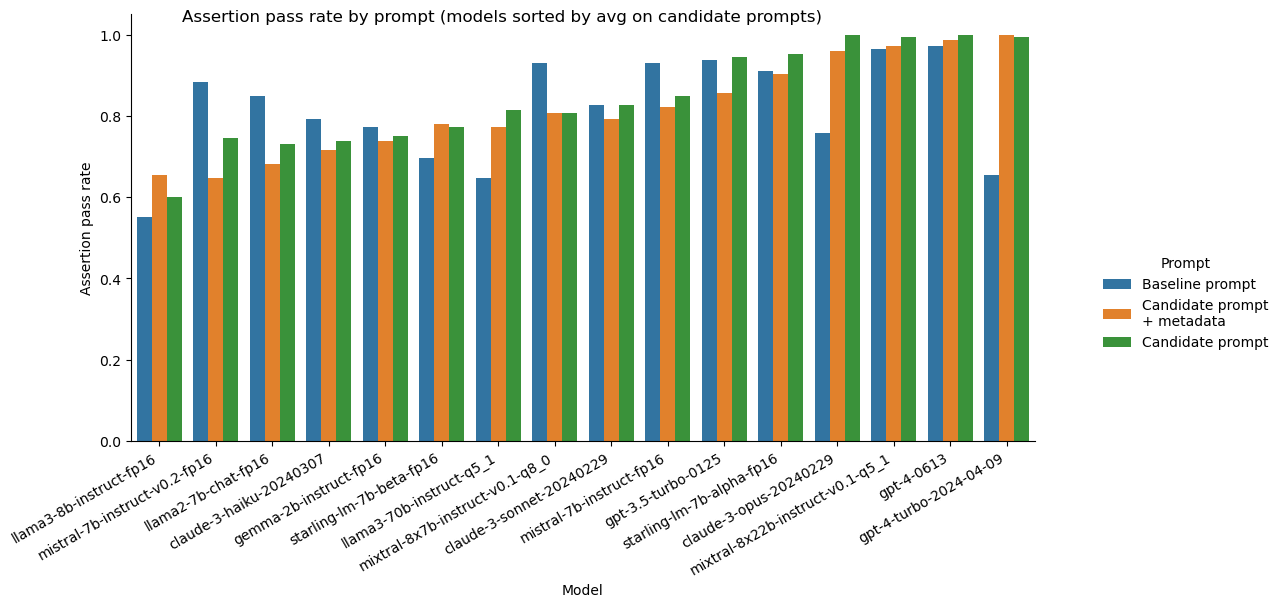

In [48]:
g = sns.catplot(
    data=df,
    x="model",
    y="pass_rate",
    hue="prompt",
    hue_order=["baseline", "candidate_with_metadata", "candidate"],
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    aspect=2,
)
g.fig.suptitle(
    "Assertion pass rate by prompt (models sorted by avg on candidate prompts)",
    ha="left",
    x=0.11,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Assertion pass rate")

g._legend.set_title("Prompt")
new_labels = ["Baseline prompt", "Candidate prompt\n+ metadata", "Candidate prompt"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

In [49]:
# this list is to check whether results match with those shown in the promptfoo's web interface
df.groupby(["model", "prompt"])["pass_rate"].mean()

model                             prompt                 
claude-3-haiku-20240307           baseline                   0.793103
                                  candidate                  0.737931
                                  candidate_with_metadata    0.717241
claude-3-opus-20240229            baseline                   0.758621
                                  candidate                  1.000000
                                  candidate_with_metadata    0.958621
claude-3-sonnet-20240229          baseline                   0.827586
                                  candidate                  0.827586
                                  candidate_with_metadata    0.793103
gemma-2b-instruct-fp16            baseline                   0.772414
                                  candidate                  0.751724
                                  candidate_with_metadata    0.737931
gpt-3.5-turbo-0125                baseline                   0.937931
                                

### Sum and normalize `comp_pass` by model and assertion type

**Description:** This statistic computed below, based on the `comp_pass` column, measures if the assertion (by model, prompt and assertion type/`comp_type`) inside each test passed or failed, which is computed by promptfoo.
The test the assertion belongs to fails if a single assertion in it fails.

In [50]:
passed_unique = results.groupby(["model", "prompt", "comp_type"])["comp_pass"].count()
display(passed_unique)
assert passed_unique.unique().shape[0] == (len(TEST_TYPES) - 1)

model                     prompt                   comp_type           
claude-3-haiku-20240307   baseline                 Formatting              120
                                                   Information accuracy     10
                                                   Spelling/grammar          5
                                                   Structure                10
                          candidate                Formatting              120
                                                                          ... 
starling-lm-7b-beta-fp16  candidate                Structure                10
                          candidate_with_metadata  Formatting              120
                                                   Information accuracy     10
                                                   Spelling/grammar          5
                                                   Structure                10
Name: comp_pass, Length: 192, dtype: int64

In [51]:
n_tests_per_group = passed_unique.loc[
    passed_unique.index[0][0], passed_unique.index[0][1]
]
display(n_tests_per_group)

comp_type
Formatting              120
Information accuracy     10
Spelling/grammar          5
Structure                10
Name: comp_pass, dtype: int64

Understanding the above numbers:
* Formatting: 120 -> 6 per test * 4 test descriptions * 5 repetitions = 120
* Information accuracy: 10 -> 6 per test * 4 test descriptions * 5 repetitions = 120
* Spelling/grammar: 5 -> 2 per test * 1 test descriptions * 5 repetitions = 10
* Structure: 10 -> 1 per test * 2 test descriptions * 5 repetitions = 10

In [52]:
df = (
    results.groupby(["model", "prompt", "comp_type"])["comp_pass"]
    .sum()
    .to_frame()
    .reset_index()
)

In [53]:
df.head()

,model,prompt,comp_type,comp_pass
0,claude-3-haiku-20240307,baseline,Formatting,93
1,claude-3-haiku-20240307,baseline,Information accuracy,10
2,claude-3-haiku-20240307,baseline,Spelling/grammar,4
3,claude-3-haiku-20240307,baseline,Structure,8
4,claude-3-haiku-20240307,candidate,Formatting,82


In [54]:
# for testing purposes
df[df["model"].str.contains("opus")]

,model,prompt,comp_type,comp_pass
12,claude-3-opus-20240229,baseline,Formatting,90
13,claude-3-opus-20240229,baseline,Information accuracy,10
14,claude-3-opus-20240229,baseline,Spelling/grammar,1
15,claude-3-opus-20240229,baseline,Structure,9
16,claude-3-opus-20240229,candidate,Formatting,120
17,claude-3-opus-20240229,candidate,Information accuracy,10
18,claude-3-opus-20240229,candidate,Spelling/grammar,5
19,claude-3-opus-20240229,candidate,Structure,10
20,claude-3-opus-20240229,candidate_with_metadata,Formatting,114
21,claude-3-opus-20240229,candidate_with_metadata,Information accuracy,10


In [55]:
df.apply(lambda x: x["comp_pass"] / n_tests_per_group[x["comp_type"]], axis=1)

0      0.775000
1      1.000000
2      0.800000
3      0.800000
4      0.683333
         ...   
187    0.900000
188    0.758333
189    0.800000
190    1.000000
191    0.900000
Length: 192, dtype: float64

In [56]:
df = df.assign(
    pass_rate=df.apply(
        lambda x: x["comp_pass"] / n_tests_per_group[x["comp_type"]], axis=1
    )
)

In [57]:
df.shape

(192, 5)

In [58]:
df.head()

,model,prompt,comp_type,comp_pass,pass_rate
0,claude-3-haiku-20240307,baseline,Formatting,93,0.775000
1,claude-3-haiku-20240307,baseline,Information accuracy,10,1.000000
2,claude-3-haiku-20240307,baseline,Spelling/grammar,4,0.800000
3,claude-3-haiku-20240307,baseline,Structure,8,0.800000
4,claude-3-haiku-20240307,candidate,Formatting,82,0.683333


In [59]:
df.sort_values("pass_rate")

,model,prompt,comp_type,comp_pass,pass_rate
47,gemma-2b-instruct-fp16,candidate_with_metadata,Structure,0,0.0
135,mistral-7b-instruct-v0.2-fp16,baseline,Structure,1,0.1
182,starling-lm-7b-beta-fp16,baseline,Spelling/grammar,1,0.2
86,llama2-7b-chat-fp16,baseline,Spelling/grammar,1,0.2
110,llama3-8b-instruct-fp16,baseline,Spelling/grammar,1,0.2
...,...,...,...,...,...
21,claude-3-opus-20240229,candidate_with_metadata,Information accuracy,10,1.0
22,claude-3-opus-20240229,candidate_with_metadata,Spelling/grammar,5,1.0
23,claude-3-opus-20240229,candidate_with_metadata,Structure,10,1.0
25,claude-3-sonnet-20240229,baseline,Information accuracy,10,1.0


In [60]:
_df_stats = df["pass_rate"].describe()
display(_df_stats)
assert _df_stats["max"] <= 1.0

count    192.000000
mean       0.819314
std        0.226628
min        0.000000
25%        0.700000
50%        0.900000
75%        1.000000
max        1.000000
Name: pass_rate, dtype: float64

### Plot by assertion type on `candidate` prompt

In [61]:
# sort models by comp_score in candidate prompt only (which is the best performing one in most models)
sorted_models = (
    df[df["prompt"].isin(("candidate",))]
    .groupby(["model", "comp_type"])["pass_rate"]
    .mean()
    .groupby("model")
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [62]:
sorted_models[-5:]

['starling-lm-7b-alpha-fp16',
 'gpt-4-turbo-2024-04-09',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'claude-3-opus-20240229',
 'gpt-4-0613']

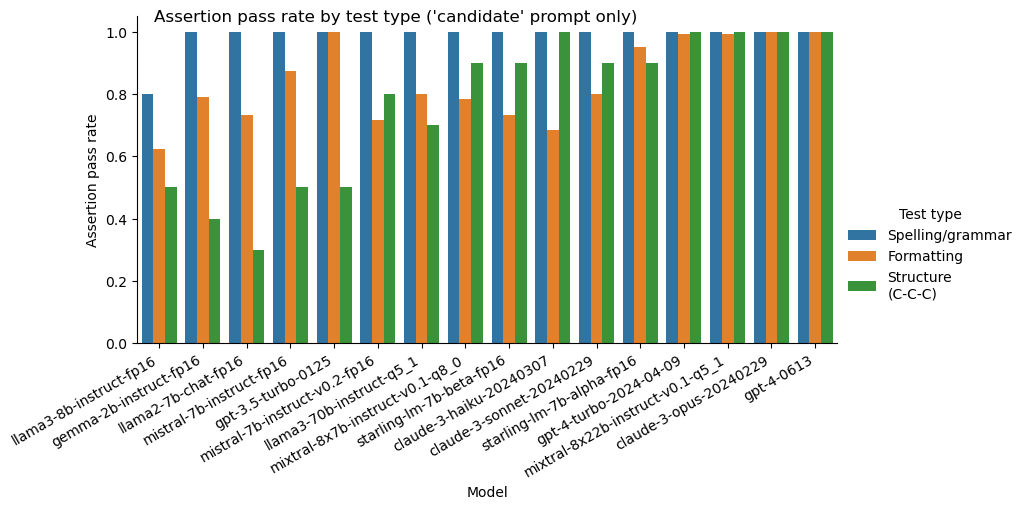

In [63]:
g = sns.catplot(
    data=df[df["prompt"] == "candidate"],
    # data=df,
    # col="prompt",
    # col_wrap=1,
    x="model",
    y="pass_rate",
    hue="comp_type",
    hue_order=[
        "Spelling/grammar",
        "Formatting",
        "Structure",
    ],
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    height=4,
    aspect=2,
    legend_out=True,
)
g.fig.suptitle(
    "Assertion pass rate by test type ('candidate' prompt only)",
    ha="left",
    x=0.11,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Assertion pass rate")

g._legend.set_title("Test type")
new_labels = [
    "Spelling/grammar",
    "Formatting",
    "Structure\n(C-C-C)",
]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

In [64]:
# for testing:
_tmp = (
    df[df["prompt"] == "candidate"].groupby(["model", "comp_type"])["pass_rate"].mean()
)

In [65]:
_tmp.index.get_level_values(0).unique()

Index(['claude-3-haiku-20240307', 'claude-3-opus-20240229',
       'claude-3-sonnet-20240229', 'gemma-2b-instruct-fp16',
       'gpt-3.5-turbo-0125', 'gpt-4-0613', 'gpt-4-turbo-2024-04-09',
       'llama2-7b-chat-fp16', 'llama3-70b-instruct-q5_1',
       'llama3-8b-instruct-fp16', 'mistral-7b-instruct-fp16',
       'mistral-7b-instruct-v0.2-fp16', 'mixtral-8x22b-instruct-v0.1-q5_1',
       'mixtral-8x7b-instruct-v0.1-q8_0', 'starling-lm-7b-alpha-fp16',
       'starling-lm-7b-beta-fp16'],
      dtype='object', name='model')

In [66]:
_tmp.loc["starling-lm-7b-alpha-fp16"]

comp_type
Formatting              0.95
Information accuracy    1.00
Spelling/grammar        1.00
Structure               0.90
Name: pass_rate, dtype: float64

### Plot by assertion type (no spelling/grammar) on `candidate` prompt

In [67]:
# sort models by score_avg in candidate prompts only (not baseline)
sorted_models = (
    df[
        df["prompt"].isin(("candidate",))
        & df["comp_type"].isin(("Formatting", "Structure"))
    ]
    .groupby(["model", "comp_type"])["pass_rate"]
    .mean()
    .groupby("model")
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [68]:
sorted_models[-5:]

['starling-lm-7b-alpha-fp16',
 'gpt-4-turbo-2024-04-09',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'claude-3-opus-20240229',
 'gpt-4-0613']

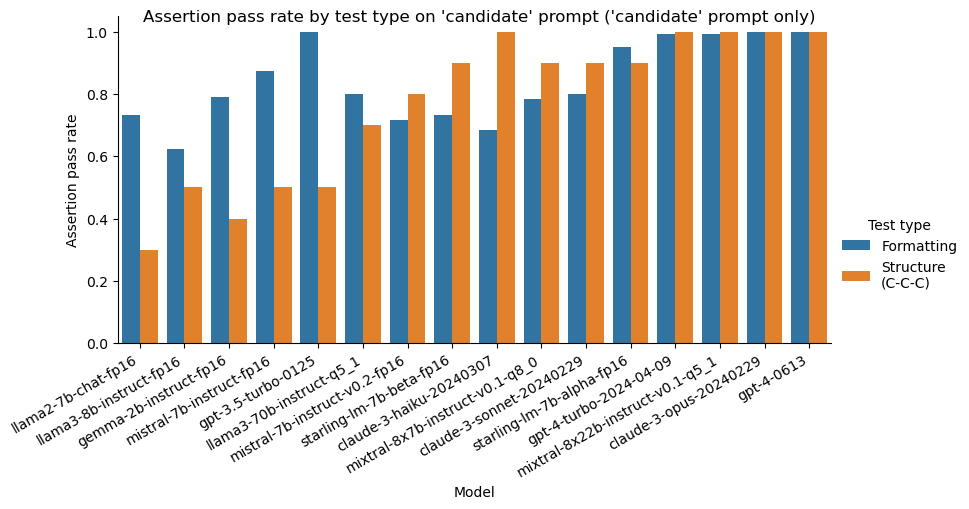

In [69]:
g = sns.catplot(
    data=df[df["prompt"] == "candidate"],
    x="model",
    y="pass_rate",
    hue="comp_type",
    hue_order=[
        # "Spelling/grammar",
        "Formatting",
        "Structure",
    ],
    kind="bar",
    order=sorted_models,
    errorbar=None,
    height=4,
    aspect=2,
    legend_out=True,
)
g.fig.suptitle(
    "Assertion pass rate by test type on 'candidate' prompt ('candidate' prompt only)",
    ha="left",
    x=0.11,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Assertion pass rate")

g._legend.set_title("Test type")
new_labels = [
    # "Spelling/grammar",
    "Formatting",
    "Structure\n(C-C-C)",
]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

## Assertion level and description (`comp_desc`)

### Sum and normalize `passed` by model and test type

**TODO**: agregate Formatting assertions? Otherwise, the plot is too cluttered.

In [70]:
passed_unique = results.groupby(["model", "prompt", "comp_desc"])["comp_pass"].count()
display(passed_unique)
assert passed_unique.unique().shape[0] == 2

model                     prompt                   comp_desc                                             
claude-3-haiku-20240307   baseline                 Does not make up references to other articles              5
                                                   Doesn't include manuscript title                          20
                                                   Doesn't reference authors, keywords, introduction, etc    20
                                                   Ends with a period                                        20
                                                   Ends with conclusion                                       5
                                                                                                             ..
starling-lm-7b-beta-fp16  candidate_with_metadata  Has roughly the same length as input                      20
                                                   Is a single paragraph                                     2

In [71]:
n_tests_per_group = passed_unique.loc[
    passed_unique.index[0][0], passed_unique.index[0][1]
]
display(n_tests_per_group)

comp_desc
Does not make up references to other articles              5
Doesn't include manuscript title                          20
Doesn't reference authors, keywords, introduction, etc    20
Ends with a period                                        20
Ends with conclusion                                       5
Has no spelling errors                                     5
Has roughly the same length as input                      20
Is a single paragraph                                     20
Keeps most references to other articles                    5
Starts with capital letter                                20
Starts with context                                        5
Name: comp_pass, dtype: int64

Understanding the above numbers:
* 5 -> 1 per test * 1 test descriptions * 5 repetitions = 5
* 20 -> 1 per test * 4 test descriptions * 5 repetitions = 20

In [72]:
df = (
    results.groupby(["model", "prompt", "comp_desc"])["comp_pass"]
    .sum()
    .to_frame()
    .reset_index()
)

In [73]:
df.head()

,model,prompt,comp_desc,comp_pass
0,claude-3-haiku-20240307,baseline,Does not make up references to other articles,5
1,claude-3-haiku-20240307,baseline,Doesn't include manuscript title,20
2,claude-3-haiku-20240307,baseline,"Doesn't reference authors, keywords, introduct...",19
3,claude-3-haiku-20240307,baseline,Ends with a period,18
4,claude-3-haiku-20240307,baseline,Ends with conclusion,3


In [74]:
# for testing purposes
df[df["model"].str.contains("opus")]

,model,prompt,comp_desc,comp_pass
33,claude-3-opus-20240229,baseline,Does not make up references to other articles,5
34,claude-3-opus-20240229,baseline,Doesn't include manuscript title,20
35,claude-3-opus-20240229,baseline,"Doesn't reference authors, keywords, introduct...",20
36,claude-3-opus-20240229,baseline,Ends with a period,15
37,claude-3-opus-20240229,baseline,Ends with conclusion,4
38,claude-3-opus-20240229,baseline,Has no spelling errors,1
39,claude-3-opus-20240229,baseline,Has roughly the same length as input,15
40,claude-3-opus-20240229,baseline,Is a single paragraph,0
41,claude-3-opus-20240229,baseline,Keeps most references to other articles,5
42,claude-3-opus-20240229,baseline,Starts with capital letter,20


In [75]:
df.apply(lambda x: x["comp_pass"] / n_tests_per_group[x["comp_desc"]], axis=1)

0      1.00
1      1.00
2      0.95
3      0.90
4      0.60
       ... 
523    0.60
524    0.10
525    0.60
526    0.85
527    1.00
Length: 528, dtype: float64

In [76]:
df = df.assign(
    pass_rate=df.apply(
        lambda x: x["comp_pass"] / n_tests_per_group[x["comp_desc"]], axis=1
    )
)

In [77]:
df.shape

(528, 5)

In [78]:
df.head()

,model,prompt,comp_desc,comp_pass,pass_rate
0,claude-3-haiku-20240307,baseline,Does not make up references to other articles,5,1.00
1,claude-3-haiku-20240307,baseline,Doesn't include manuscript title,20,1.00
2,claude-3-haiku-20240307,baseline,"Doesn't reference authors, keywords, introduct...",19,0.95
3,claude-3-haiku-20240307,baseline,Ends with a period,18,0.90
4,claude-3-haiku-20240307,baseline,Ends with conclusion,3,0.60


In [79]:
df.sort_values("pass_rate")

,model,prompt,comp_desc,comp_pass,pass_rate
327,llama3-8b-instruct-fp16,candidate_with_metadata,Keeps most references to other articles,0,0.0
282,llama3-70b-instruct-q5_1,candidate,Is a single paragraph,0,0.0
31,claude-3-haiku-20240307,candidate_with_metadata,Starts with capital letter,0,0.0
274,llama3-70b-instruct-q5_1,baseline,Starts with context,0,0.0
272,llama3-70b-instruct-q5_1,baseline,Keeps most references to other articles,0,0.0
...,...,...,...,...,...
186,gpt-4-0613,candidate,Starts with context,5,1.0
185,gpt-4-0613,candidate,Starts with capital letter,20,1.0
184,gpt-4-0613,candidate,Keeps most references to other articles,5,1.0
182,gpt-4-0613,candidate,Has roughly the same length as input,20,1.0


In [80]:
_df_stats = df["pass_rate"].describe()
display(_df_stats)
assert _df_stats["max"] <= 1.0

count    528.000000
mean       0.816004
std        0.305678
min        0.000000
25%        0.800000
50%        1.000000
75%        1.000000
max        1.000000
Name: pass_rate, dtype: float64

### Plot by assertion on `candidate` prompt

In [81]:
# sort models by comp_score in candidate prompt only (which is the best performing one in most models)
sorted_models = (
    df[df["prompt"].isin(("candidate",))]
    .groupby(["model", "comp_desc"])["pass_rate"]
    .mean()
    .groupby("model")
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [82]:
sorted_models[-5:]

['starling-lm-7b-alpha-fp16',
 'gpt-4-turbo-2024-04-09',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'claude-3-opus-20240229',
 'gpt-4-0613']

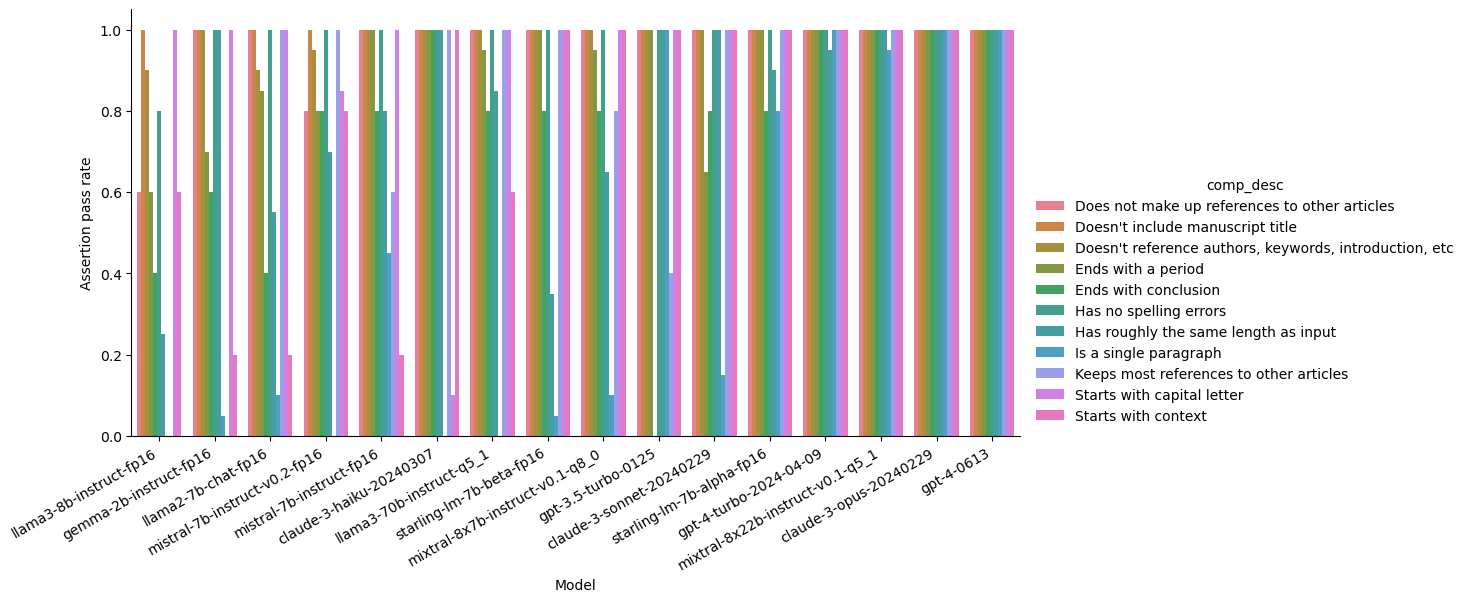

In [83]:
g = sns.catplot(
    data=df[df["prompt"] == "candidate"],
    # data=df,
    # col="prompt",
    # col_wrap=1,
    x="model",
    y="pass_rate",
    hue="comp_desc",
    # hue_order=[
    #     "Spelling/grammar",
    #     "Formatting",
    #     "Structure",
    # ],
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    height=5,
    aspect=2,
    legend_out=True,
)
# g.fig.suptitle(
#     "Assertion pass rate by test type on 'candidate' prompt (models sorted by avg on 'candidate' prompt)",
#     ha="left",
#     x=0.11,
# )
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Assertion pass rate")

# g._legend.set_title("Test type")
# new_labels = [
#     "Spelling/grammar",
#     "Formatting",
#     "Structure\n(C-C-C)",
# ]
# for t, l in zip(g._legend.texts, new_labels):
#     t.set_text(l)

# Average score (`score_avg`, by promptfoo)

## Stats

In [84]:
results["test_description"].unique()

array(['Has no spelling errors',
       "Keeps most references to other articles and doesn't make them up",
       'starts with context', 'ends with conclusion'], dtype=object)

In [85]:
# used to normalize
MAX_SCORE = {
    "Has no spelling errors": 0.50,
    "Keeps most references to other articles and doesn't make them up": ((0.25 * 6) + 4)
    / 8.0,
    "starts with context": ((0.25 * 6) + 2) / 7.0,
    "ends with conclusion": ((0.25 * 6) + 2) / 7.0,
}

## Test level

### Normalize `score_avg`

In [86]:
df = results.copy()

In [87]:
df.shape

(6960, 10)

In [88]:
df.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, introduct...",Formatting


In [89]:
df.groupby("model")["score_avg"].mean().sort_values()

model
llama3-8b-instruct-fp16             0.304598
gemma-2b-instruct-fp16              0.333333
llama2-7b-chat-fp16                 0.390805
llama3-70b-instruct-q5_1            0.403448
starling-lm-7b-beta-fp16            0.410345
mistral-7b-instruct-v0.2-fp16       0.412644
gpt-3.5-turbo-0125                  0.420115
mistral-7b-instruct-fp16            0.420690
claude-3-sonnet-20240229            0.470115
starling-lm-7b-alpha-fp16           0.472989
mixtral-8x7b-instruct-v0.1-q8_0     0.473563
claude-3-haiku-20240307             0.477011
gpt-4-turbo-2024-04-09              0.486207
mixtral-8x22b-instruct-v0.1-q5_1    0.504598
claude-3-opus-20240229              0.505747
gpt-4-0613                          0.523563
Name: score_avg, dtype: float64

In [90]:
df.apply(lambda x: x["score_avg"] / MAX_SCORE[x["test_description"]], axis=1)

0       0.357143
1       0.357143
2       0.357143
3       0.357143
4       0.357143
          ...   
6955    0.857143
6956    0.857143
6957    0.857143
6958    0.857143
6959    0.857143
Length: 6960, dtype: float64

In [91]:
df = df.assign(
    score_avg=df.apply(
        lambda x: x["score_avg"] / MAX_SCORE[x["test_description"]], axis=1
    )
)

In [92]:
_df_stats = df.groupby("test_description")["score_avg"].describe()
display(_df_stats)

,count,mean,std,min,25%,50%,75%,max
test_description,,,,,,,,
Has no spelling errors,1680.0,0.869940,0.200150,0.214286,0.857143,0.928571,1.000000,1.0
Keeps most references to other articles and doesn't make them up,1920.0,0.832765,0.210702,0.136364,0.636364,0.954545,1.000000,1.0
ends with conclusion,1680.0,0.726488,0.282204,0.214286,0.428571,0.857143,0.946429,1.0
starts with context,1680.0,0.725000,0.253815,0.214286,0.500000,0.785714,1.000000,1.0


In [93]:
_df_stats = df["score_avg"].describe()
display(_df_stats)
assert _df_stats["max"].max() <= 1.0

count    6960.000000
mean        0.790073
std         0.246387
min         0.136364
25%         0.636364
50%         0.909091
75%         1.000000
max         1.000000
Name: score_avg, dtype: float64

In [94]:
df.groupby("model")["score_avg"].mean().sort_values()

model
llama3-8b-instruct-fp16             0.567189
gemma-2b-instruct-fp16              0.605852
llama2-7b-chat-fp16                 0.692894
llama3-70b-instruct-q5_1            0.725392
starling-lm-7b-beta-fp16            0.732602
mistral-7b-instruct-v0.2-fp16       0.738454
mistral-7b-instruct-fp16            0.756113
gpt-3.5-turbo-0125                  0.768130
claude-3-sonnet-20240229            0.840230
starling-lm-7b-alpha-fp16           0.845977
mixtral-8x7b-instruct-v0.1-q8_0     0.857158
claude-3-haiku-20240307             0.858725
gpt-4-turbo-2024-04-09              0.885266
mixtral-8x22b-instruct-v0.1-q5_1    0.905747
claude-3-opus-20240229              0.910240
gpt-4-0613                          0.951202
Name: score_avg, dtype: float64

### Plot by prompt

In [95]:
# sort models by score_avg in candidate prompts only (not baseline)
sorted_models = (
    df[df["prompt"].isin(("candidate", "candidate_with_metadata"))]
    .groupby("model")["score_avg"]
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [96]:
sorted_models[-5:]

['claude-3-sonnet-20240229',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'gpt-4-0613',
 'claude-3-opus-20240229',
 'gpt-4-turbo-2024-04-09']

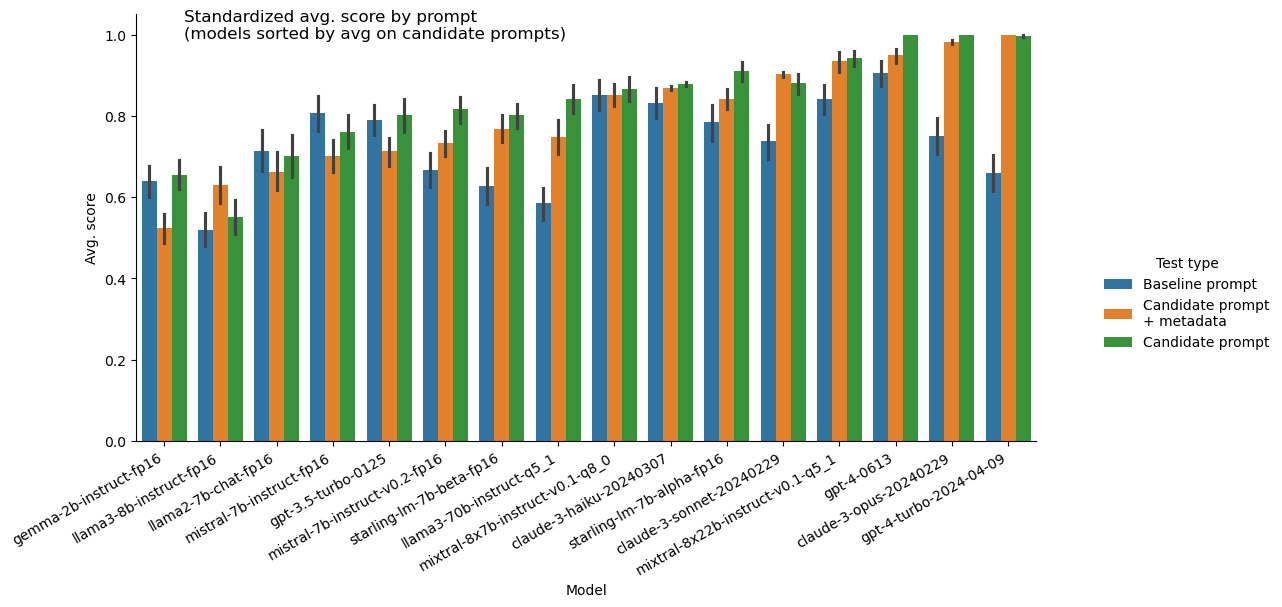

In [97]:
g = sns.catplot(
    data=df,
    x="model",
    y="score_avg",
    hue="prompt",
    hue_order=["baseline", "candidate_with_metadata", "candidate"],
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    aspect=2,
)
g.fig.suptitle(
    "Standardized avg. score by prompt\n(models sorted by avg on candidate prompts)",
    ha="left",
    x=0.11,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Avg. score")

g._legend.set_title("Test type")
new_labels = ["Baseline prompt", "Candidate prompt\n+ metadata", "Candidate prompt"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Score per assertion (`comp_score`)

## Stats

In [98]:
df = results.copy()

In [99]:
df.shape

(6960, 10)

In [100]:
df.head()

,model,passed,score_avg,prompt,test_description,comp_pass,comp_score,comp_reason,comp_desc,comp_type
0,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Starts with capital letter,Formatting
1,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Ends with a period,Formatting
2,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,False,0.00,Failed,Is a single paragraph,Formatting
3,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,Doesn't include manuscript title,Formatting
4,claude-3-haiku-20240307,False,0.178571,baseline,Has no spelling errors,True,0.25,Passed,"Doesn't reference authors, keywords, introduct...",Formatting


In [101]:
df["prompt"].value_counts()

prompt
baseline                   2320
candidate_with_metadata    2320
candidate                  2320
Name: count, dtype: int64

In [102]:
df["test_description"].value_counts()

test_description
Keeps most references to other articles and doesn't make them up    1920
Has no spelling errors                                              1680
starts with context                                                 1680
ends with conclusion                                                1680
Name: count, dtype: int64

In [103]:
df["comp_type"].value_counts()

comp_type
Formatting              5760
Information accuracy     480
Structure                480
Spelling/grammar         240
Name: count, dtype: int64

## Normalize `comp_score`

In [104]:
df.groupby("model")["comp_score"].mean().sort_values()

model
llama3-8b-instruct-fp16             0.304598
gemma-2b-instruct-fp16              0.333333
llama2-7b-chat-fp16                 0.390805
llama3-70b-instruct-q5_1            0.403448
starling-lm-7b-beta-fp16            0.410345
mistral-7b-instruct-v0.2-fp16       0.412644
gpt-3.5-turbo-0125                  0.420115
mistral-7b-instruct-fp16            0.420690
claude-3-sonnet-20240229            0.470115
starling-lm-7b-alpha-fp16           0.472989
mixtral-8x7b-instruct-v0.1-q8_0     0.473563
claude-3-haiku-20240307             0.477011
gpt-4-turbo-2024-04-09              0.486207
mixtral-8x22b-instruct-v0.1-q5_1    0.504598
claude-3-opus-20240229              0.505747
gpt-4-0613                          0.523563
Name: comp_score, dtype: float64

In [105]:
# Warning: this values depend on those assigned in the `promptfooconfig.yaml` file
df.loc[df["comp_type"] == "Formatting", "comp_score"] = (
    df.loc[df["comp_type"] == "Formatting", "comp_score"] / 0.25
)
df.loc[df["comp_type"] == "Spelling/grammar", "comp_score"] = (
    df.loc[df["comp_type"] == "Spelling/grammar", "comp_score"] / 2.0
)
df.loc[df["comp_type"] == "Structure", "comp_score"] = (
    df.loc[df["comp_type"] == "Structure", "comp_score"] / 2.0
)
# only in introduction:
df.loc[df["comp_type"] == "Information accuracy", "comp_score"] = (
    df.loc[df["comp_type"] == "Information accuracy", "comp_score"] / 2.0
)

In [106]:
df.groupby("model")["comp_score"].mean().sort_values()

model
llama3-8b-instruct-fp16             0.598851
starling-lm-7b-beta-fp16            0.732184
llama3-70b-instruct-q5_1            0.744828
claude-3-haiku-20240307             0.749425
llama2-7b-chat-fp16                 0.750575
gemma-2b-instruct-fp16              0.754023
mistral-7b-instruct-v0.2-fp16       0.757471
claude-3-sonnet-20240229            0.810345
mixtral-8x7b-instruct-v0.1-q8_0     0.848276
mistral-7b-instruct-fp16            0.862069
gpt-4-turbo-2024-04-09              0.882759
claude-3-opus-20240229              0.904598
gpt-3.5-turbo-0125                  0.908046
starling-lm-7b-alpha-fp16           0.910345
mixtral-8x22b-instruct-v0.1-q5_1    0.964368
gpt-4-0613                          0.983908
Name: comp_score, dtype: float64

In [107]:
_df_stats = df["comp_score"].describe()
display(_df_stats)
assert _df_stats["max"] <= 1.0

count    6960.000000
mean        0.822629
std         0.379225
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: comp_score, dtype: float64

## Plot by prompt

In [108]:
# sort models by comp_score in candidate prompts only (not baseline)
sorted_models = (
    df[df["prompt"].isin(("candidate", "candidate_with_metadata"))]
    .groupby("model")["comp_score"]
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [109]:
sorted_models[-5:]

['starling-lm-7b-alpha-fp16',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'claude-3-opus-20240229',
 'gpt-4-0613',
 'gpt-4-turbo-2024-04-09']

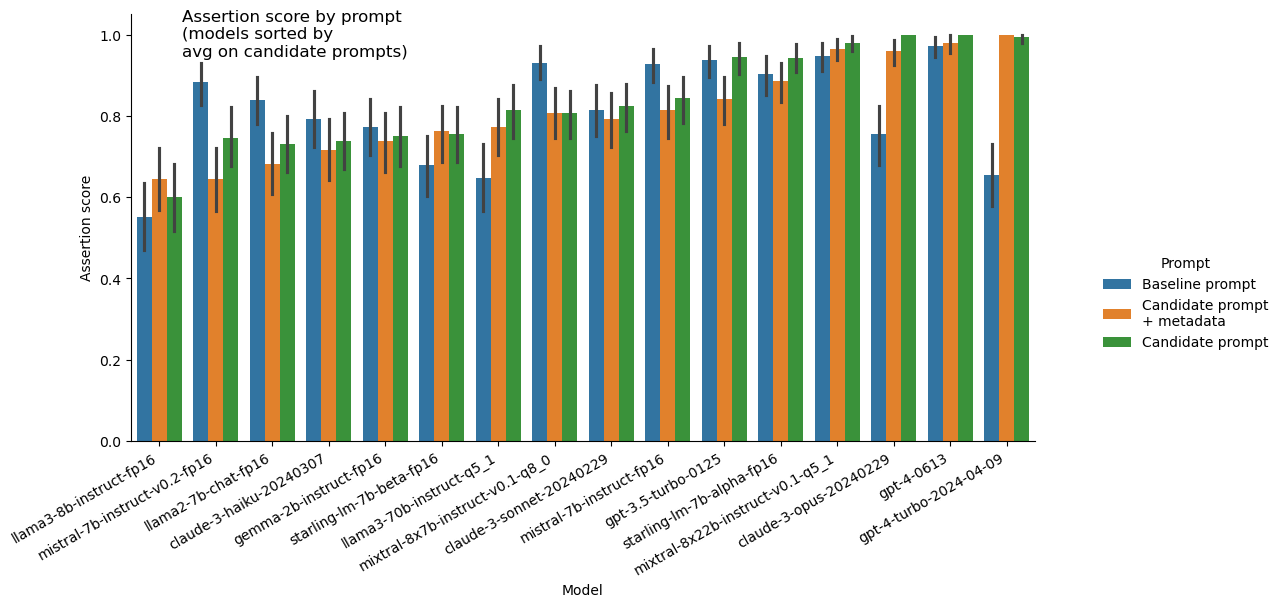

In [110]:
g = sns.catplot(
    data=df,
    x="model",
    y="comp_score",
    hue="prompt",
    hue_order=["baseline", "candidate_with_metadata", "candidate"],
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    aspect=2,
)
g.fig.suptitle(
    "Assertion score by prompt\n(models sorted by\navg on candidate prompts)",
    ha="left",
    x=0.11,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Assertion score")

g._legend.set_title("Prompt")
new_labels = ["Baseline prompt", "Candidate prompt\n+ metadata", "Candidate prompt"]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

## Plot by test type on `candidate` prompt

In [111]:
# sort models by score_avg in candidate prompts only (not baseline)
sorted_models = (
    df[df["prompt"].isin(("candidate",))]
    .groupby(["model", "comp_type"])["comp_score"]
    .mean()
    .groupby("model")
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [112]:
sorted_models[-5:]

['starling-lm-7b-alpha-fp16',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'gpt-4-turbo-2024-04-09',
 'claude-3-opus-20240229',
 'gpt-4-0613']

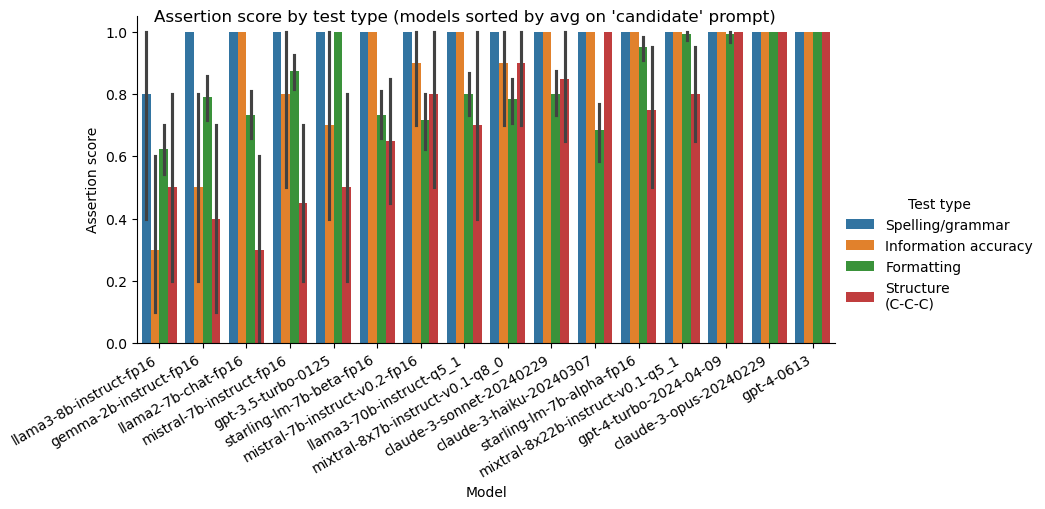

In [113]:
g = sns.catplot(
    data=df[df["prompt"] == "candidate"],
    x="model",
    y="comp_score",
    hue="comp_type",
    hue_order=[
        "Spelling/grammar",
        "Information accuracy",
        "Formatting",
        "Structure",
    ],
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    height=4,
    aspect=2,
    legend_out=True,
)
g.fig.suptitle(
    "Assertion score by test type (models sorted by avg on 'candidate' prompt)",
    ha="left",
    x=0.11,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Assertion score")

# leg = g.axes.flat[0].get_legend()
# leg.set_title("")
g._legend.set_title("Test type")
new_labels = [
    "Spelling/grammar",
    "Information accuracy",
    "Formatting",
    "Structure\n(C-C-C)",
]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

## Plot by test type (no spelling/grammar) + `candidate` prompt

In [114]:
# sort models by score_avg in candidate prompts only (not baseline)
sorted_models = (
    df[
        df["prompt"].isin(("candidate",))
        & df["comp_type"].isin(("Formatting", "Information accuracy", "Structure"))
    ]
    .groupby(["model", "comp_type"])["comp_score"]
    .mean()
    .groupby("model")
    .mean()
    .sort_values()
    .index.get_level_values("model")
    .tolist()
)
assert len(set(sorted_models)) == len(sorted_models)

In [115]:
sorted_models[-5:]

['starling-lm-7b-alpha-fp16',
 'mixtral-8x22b-instruct-v0.1-q5_1',
 'gpt-4-turbo-2024-04-09',
 'claude-3-opus-20240229',
 'gpt-4-0613']

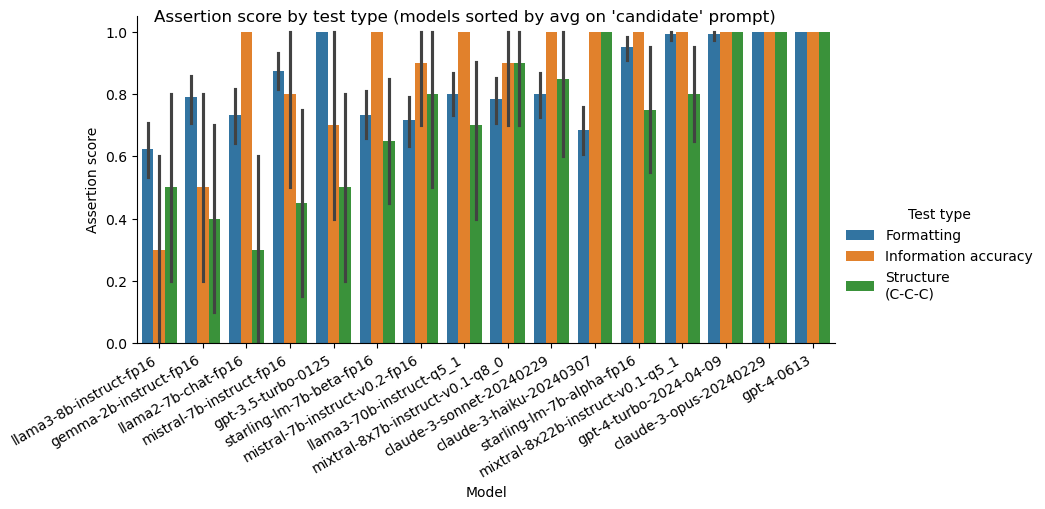

In [116]:
g = sns.catplot(
    data=df[df["prompt"] == "candidate"],
    x="model",
    y="comp_score",
    hue="comp_type",
    hue_order=[
        # "Spelling/grammar",
        "Formatting",
        "Information accuracy",
        "Structure",
    ],
    kind="bar",
    order=sorted_models,
    # errorbar=None,
    height=4,
    aspect=2,
    legend_out=True,
)
g.fig.suptitle(
    "Assertion score by test type (models sorted by avg on 'candidate' prompt)",
    ha="left",
    x=0.11,
)
g.set_xticklabels(rotation=30, ha="right")
g.set(xlabel="Model", ylabel="Assertion score")

# leg = g.axes.flat[0].get_legend()
# leg.set_title("")
g._legend.set_title("Test type")
new_labels = [
    # "Spelling/grammar",
    "Formatting",
    "Information accuracy",
    "Structure\n(C-C-C)",
]
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

g.fig.savefig(
    OUTPUT_FIGURES_DIR / "introduction-assertion_score_by_test_type.png",
    bbox_inches="tight",
    dpi=300,
)

g.fig.savefig(
    OUTPUT_FIGURES_DIR / "introduction-assertion_score_by_test_type.svg",
    bbox_inches="tight",
    facecolor="white",
)